In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array(x_train,dtype = np.float64)
x_test = np.array(x_test,dtype = np.float64)

In [ ]:
%matplotlib inline

3
AxesImage(54,36;334.8x217.44)


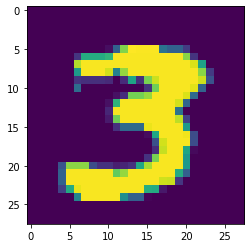

In [ ]:
import matplotlib.pyplot as plt
index = 27
print(y_train[index])
print(plt.imshow(x_train[index]))
plt.show()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# save input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0],img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols, 1)
x_train /= 255
x_test /= 255

In [ ]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D , Conv2D
model = Sequential() # empty NN model - basis for adding other layers

In [ ]:
# adding the first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

In [ ]:
# adding second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu')) 

In [ ]:
# adding a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# droping out some units in order to avoid overfitting
model.add(Dropout(0.25))

In [ ]:
# adding a flattening layer to convert the previous hidden layer in to a 1D array
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [ ]:
# The “softmax” activation is used when we’d like to classify the data into a number of pre-decided classes.
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [ ]:
batch_size = 128 # The batch size is a number of samples processed before the model is updated.
epochs = 10 # The number of epochs is the number of complete passes through the training dataset.
model.fit(x_train,y_train,batch_size=batch_size, epochs = epochs, verbose = 1,validation_data = (x_test,y_test))
score = model.evaluate(x_test,y_test, verbose=0)
print("test loss : ",score[0])
print("test accuracy : ",score[1])
model.save("test_model")

Epoch 1/10
469/469 [==============================] - 138s 294ms/step - loss: 0.3436 - accuracy: 0.8048 - val_loss: 0.3311 - val_accuracy: 0.8054
Epoch 2/10
469/469 [==============================] - 136s 290ms/step - loss: 0.3326 - accuracy: 0.8050 - val_loss: 0.3261 - val_accuracy: 0.8064
Epoch 3/10
469/469 [==============================] - 135s 289ms/step - loss: 0.3272 - accuracy: 0.8076 - val_loss: 0.3219 - val_accuracy: 0.8076
Epoch 4/10
469/469 [==============================] - 138s 293ms/step - loss: 0.3203 - accuracy: 0.8121 - val_loss: 0.3102 - val_accuracy: 0.8107
Epoch 5/10
469/469 [==============================] - 138s 293ms/step - loss: 0.3038 - accuracy: 0.8528 - val_loss: 0.2665 - val_accuracy: 0.9035
Epoch 6/10
469/469 [==============================] - 138s 294ms/step - loss: 0.2469 - accuracy: 0.9043 - val_loss: 0.2263 - val_accuracy: 0.9045
Epoch 7/10
469/469 [==============================] - 138s 294ms/step - loss: 0.2217 - accuracy: 0.9089 - val_loss: 0.2133 -